<a href="https://colab.research.google.com/github/gomong0304/Python25Study/blob/master/04_01_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# MBC 쇼핑몰에서는 럭키백을 판매하기로 하였다.

# 럭키팩에는 생선이 들어 있는데 종류가 7가지로 랜덤하게 들어 있다.
# 럭키팩에 확율을 표시해야 함 : 들어있는 7가지의 생선의 확률이 필요함

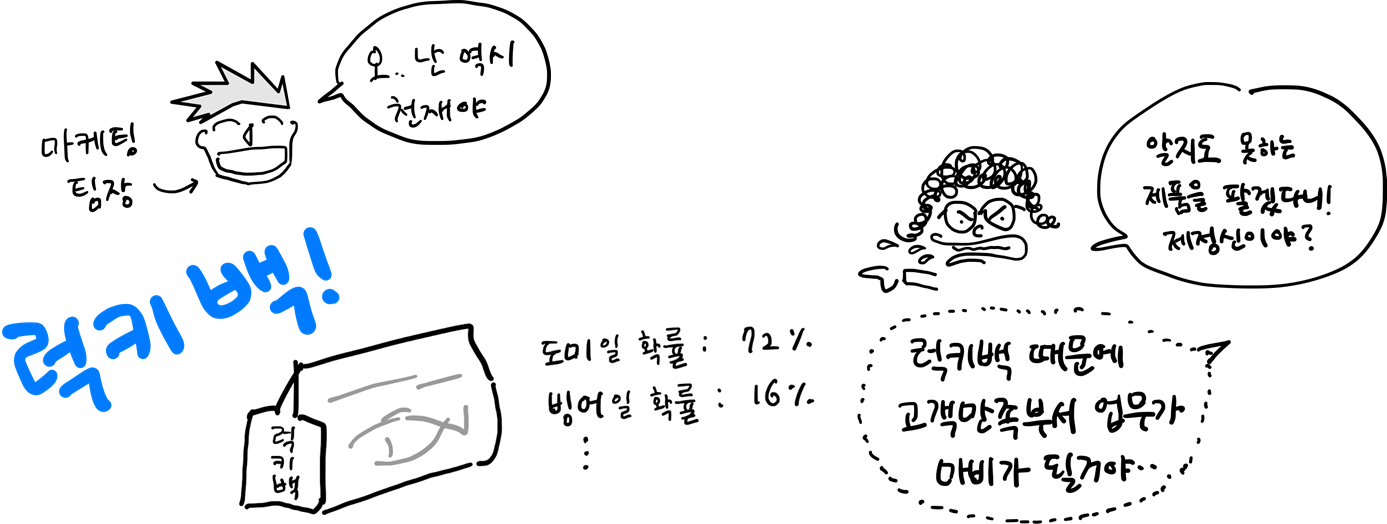

In [ ]:
# 럭키백의 확률 : 생선이 7마리라고 가정함
# 생선의 크기, 무게 (길이, 높이, 두께, 대각선의길이, 무게)

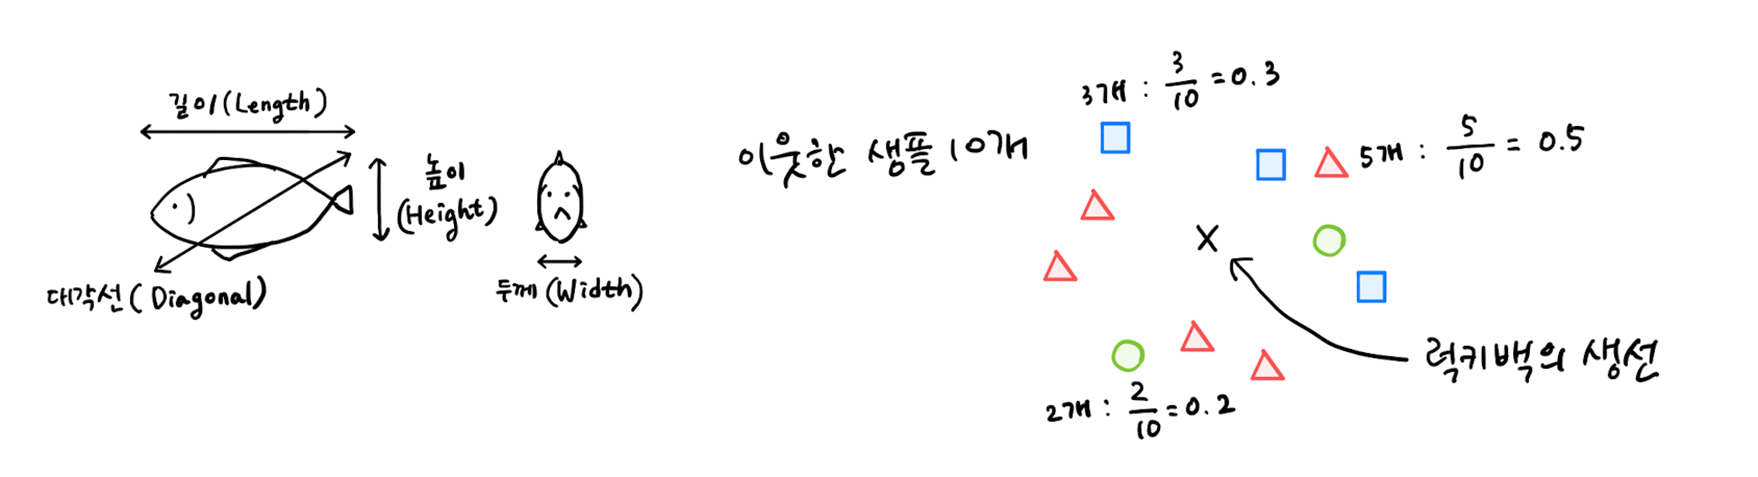

In [1]:
# k-최근접 알고리즘을 이용해보면 회귀? 분류?
# 확률을 알고 싶은 것이기 때문에 회귀를 사용해보자!!!

# 샘플 10개중에 농어가 3개면 ?  3 / 10 = 0.3
# 빙어가 5개면 ?  5 / 10 = 0.5
# 도미가 2개면 ?  2 / 10 = 0.2 = 100%

# 사이킷런의 k-최근접 이웃 분리기도 이와 동일한 방식으로 확율 계산도 해줌

# 샘플데이터 준비
# 로지스틱 회귀 : 럭키백 확율
import pandas as pd # 판다스로 csv를 처리함

fish = pd.read_csv('https://bit.ly/fish_csv_data') # 웹에 있는 파일을 가져옴
fish.head() # 제일 위쪽 데이터 5개를 보여줌
# 어종(스피시즈), 무게, 길이, 대각선, 키, 너비(두께)

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
print(pd.unique(fish['Species'])) # 유니크하게 종류를 출력

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
# Bream : 브림(도미)
# Roach : 로치(대구)
# Whitefish : 잉어
# Parkki : 붕어
# Perch : 농어
# Pike : 감물치
# Smelt : 빙어
# 7개의 종류의 어종이 분포되어 있음

In [3]:
# 분석용 입력 리스트값 생성
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
# 원하는 필드를 넣어 필터링
print(fish_input[:5])  # 앞에서부터 5개만 출력

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [4]:
# 정답 리스트 생성
fish_target = fish['Species'].to_numpy()
# fish[['Species']] 이렇게 하면 2차원 배열됨(금지)
print(fish_target[:5])

['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


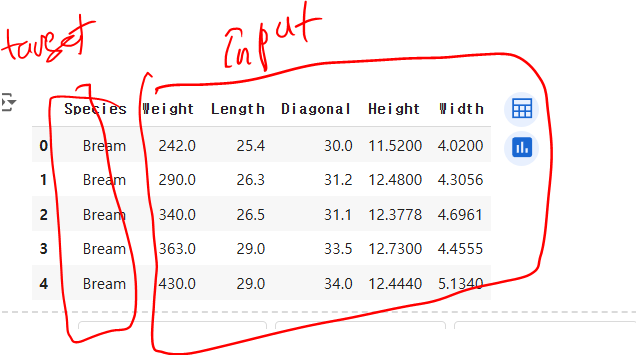

In [5]:
# 훈련세트 생성
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

print(train_input.shape, test_input.shape)
# 훈련용 119개의 5개의 특성
# 테스트용 40개의 5개 특성

(119, 5) (40, 5)


In [6]:
from sklearn.preprocessing import StandardScaler
# 표준점수는 데이터의 범위(스케일조정) = (값 - 평균) / 표준편차
ss = StandardScaler()   # 싸이킷런의 전처리용(스케일조정 : 표준점수)
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
print(train_scaled[:5])

[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [ 0.30041219  1.54653445  1.45316551 -0.46981663  0.27291745]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [-0.79734143 -0.60880176 -0.67486907 -0.82480589 -0.27631471]
 [-0.71289885 -0.73062511 -0.70092664 -0.0802298  -0.7033869 ]]


In [7]:
# k-최근접 이웃 분류기의 확률 예측
from sklearn.neighbors import KNeighborsClassifier # 분류용

kn = KNeighborsClassifier(n_neighbors=3)    # 이웃 3개 참고
kn.fit(train_scaled, train_target)          # 훈련시작

print(kn.score(train_scaled, train_target)) # 훈련점수 89.07%
print(kn.score(test_scaled, test_target))   # 테스트 점수 85.00%

0.8907563025210085
0.85


In [8]:
# 전에는 0와 1을 찾는 이진분류 였지만 지금 타켓에 7개의 어종을 넣었음
print(kn.classes_)
# 7개의 생선 종류가 들어있다.
# 2개이상 클래스가 포함된 문제를 다중 분류라고 함.
# 주의사항 : 클래스의 순서가 인덱스로 되어 있으며 이것이 오름차순 형태로 보임

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [9]:
print(kn.predict(test_scaled[:5])) # 0~4번 인덱스까지 보자
# 처음 5개 샘플을 타깃값 예측 해보면 아래와 같다.

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [10]:
print(test_scaled[:5]) # 전처리과정에서 표준점수로 변환되어 보임

[[-0.88741352 -0.91804565 -1.03098914 -0.90464451 -0.80762518]
 [-1.06924656 -1.50842035 -1.54345461 -1.58849582 -1.93803151]
 [-0.54401367  0.35641402  0.30663259 -0.8135697  -0.65388895]
 [-0.34698097 -0.23396068 -0.22320459 -0.11905019 -0.12233464]
 [-0.68475132 -0.51509149 -0.58801052 -0.8998784  -0.50124996]]


In [11]:
import numpy as np  # 특성에 대한 확률을 보기 위해서 변환

proba = kn.predict_proba(test_scaled[:5])
# 사이킷 런이 번거러운 연산을 수행해줌으로 쉽게 결과가 나옴
print(np.round(proba, decimals=4))
# 소수점 네번째 자리까지 표시(다섯번째에서 반올림)
# Bream Parkki Perch  Pike  Roach  Smelt  Whitefish' 이순서
# [[0.     0.     1.     0.     0.     0.     0.    ]
#  [0.     0.     0.     0.     0.     1.     0.    ]
#  [0.     0.     0.     1.     0.     0.     0.    ]
#  [0.     0.     0.6667 0.     0.3333 0.     0.    ]
#  [0.     0.     0.6667 0.     0.3333 0.     0.    ]]

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [ ]:
# ['Perch'  100%
#  'Smelt'  100%
#  'Pike'   100%
#  'Perch'  66.66%
#  'Perch'  66.66% ] 3개의 이웃에 대한 분류 결과를 확인할 수 있다.

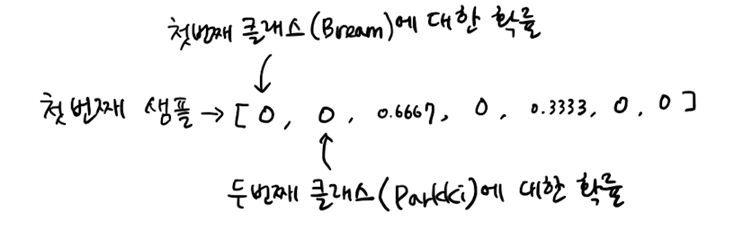

In [12]:
# 이 모델이 계산한 확률이 가장 가까운 이웃의 비율이 맞는지 확인 필요함
distances, indexes = kn.kneighbors(test_scaled[3:4])
                                              # 4번째 값을 자세히 보자
print(train_target[indexes])
#                 Perch         Roach
#  [0.     0.     0.6667 0.     0.3333 0.     0.    ]
# Perch 2/3 , Roach 1/3 이기 때문에 7개를 확율로 제공되지 못함
# 이유 : n_neighbors=3으로 했기 때문에

[['Roach' 'Perch' 'Perch']]


In [ ]:
# kneighbors는 더미데이터보다 더 높은 값이 들어올때 문제가 생긴다.
# 알고리즘 변경 해보자 : 로지스틱 회귀(LogisticRegression)
# 로지스틱 회귀는 사이킷런에서 제공함 from sklearn.linear_model import LogisticRegression
# 로지스틱 회귀는 이름이 회귀이지만 분류 모델임

# 선형회귀와 동일하게 선형방정식을 학습한다.
# z = a * (Weight) + b * (Length) + c * (Diagonal) + d * (Height) + e * (Width) + f
# a, b, c, d, e, f 는 각 항목에 대한 가중치(중요도, 계수) 임
# z는 어떤 값도 가능함 하지만 확율이 되려면 0~1 (0% ~ 100%) 사이값
# z가 아주 큰 음수일때 0, 아주 큰 양수일때 1이 되도록 바꾸는 방법은 시그모이드 함수나 로지스틱 함수

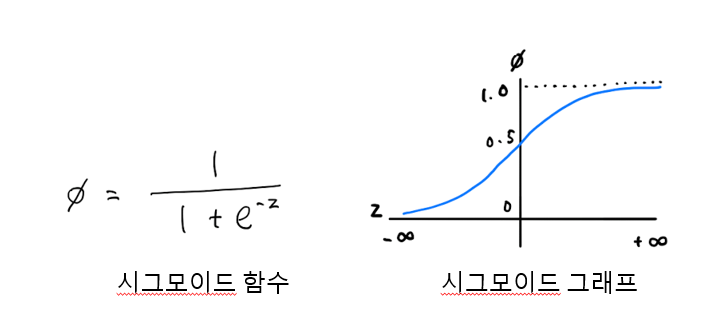